In [2]:
# 1. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/one /Regressão Linear/hoteis.csv")  # no Colab, use o caminho após upload
df.head()


,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


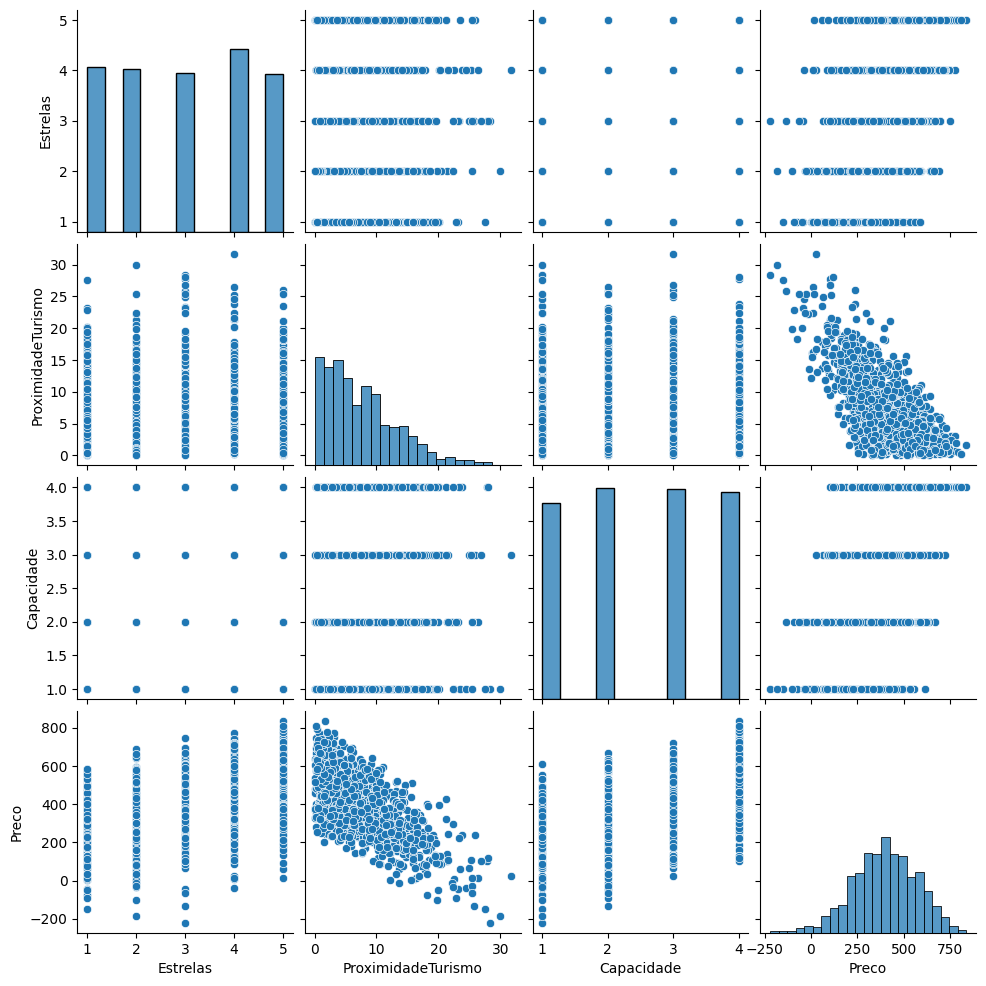

In [3]:
# 3. Análise inicial com PairPlot
sns.pairplot(df)
plt.show()


In [4]:
# 4. Selecionar variáveis para regressão
# (exemplo: prever 'Preco' usando outras colunas numéricas)
X = df.drop(columns=["Preco"])
y = df["Preco"]

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# 5. Construir modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Coeficientes: [ 50.41089867 -19.91133103  80.94528784]
Intercepto: 192.82725270583728
R²: 0.9244945040197875


TypeError: got an unexpected keyword argument 'squared'

In [8]:
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", rmse)


Coeficientes: [ 50.41089867 -19.91133103  80.94528784]
Intercepto: 192.82725270583728
R²: 0.9244945040197875
RMSE: 47.523971074248074


In [11]:
print(df.columns)


Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')


In [14]:
import numpy as np

# Modelo 1 - usando apenas 'Estrelas'
X1 = df[["Estrelas"]]
y1 = df["Preco"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

modelo1 = LinearRegression()
modelo1.fit(X1_train, y1_train)
y1_pred = modelo1.predict(X1_test)

rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred))

print("Modelo 1 - usando apenas Estrelas")
print("R²:", r2_score(y1_test, y1_pred))
print("RMSE:", rmse1)

# Modelo 2 - usando todas as variáveis
X = df.drop(columns=["Preco"])
y = df["Preco"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)
y_pred = modelo2.predict(X_test)

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModelo 2 - usando Estrelas, ProximidadeTurismo e Capacidade")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", rmse2)


Modelo 1 - usando apenas Estrelas
R²: 0.12282353111445166
RMSE: 161.9820634051927

Modelo 2 - usando Estrelas, ProximidadeTurismo e Capacidade
R²: 0.9244945040197875
RMSE: 47.523971074248074


In [17]:
import statsmodels.api as sm

# Modelo 1 - usando apenas Estrelas
X1 = df[["Estrelas"]]
y = df["Preco"]

# Adiciona constante (intercepto)
X1 = sm.add_constant(X1)

modelo1 = sm.OLS(y, X1).fit()
print(modelo1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           6.09e-40
Time:                        22:06:01   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517     11.752     21.218      0.0

In [18]:
# Modelo 2 - usando todas as variáveis preditoras
X2 = df[["Estrelas", "ProximidadeTurismo", "Capacidade"]]
y = df["Preco"]

# Adiciona constante (intercepto)
X2 = sm.add_constant(X2)

modelo2 = sm.OLS(y, X2).fit()
print(modelo2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3981.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:06:09   Log-Likelihood:                -5282.3
No. Observations:                1000   AIC:                         1.057e+04
Df Residuals:                     996   BIC:                         1.059e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                192.8442      5

R²: 0.9245
RMSE: 47.5240


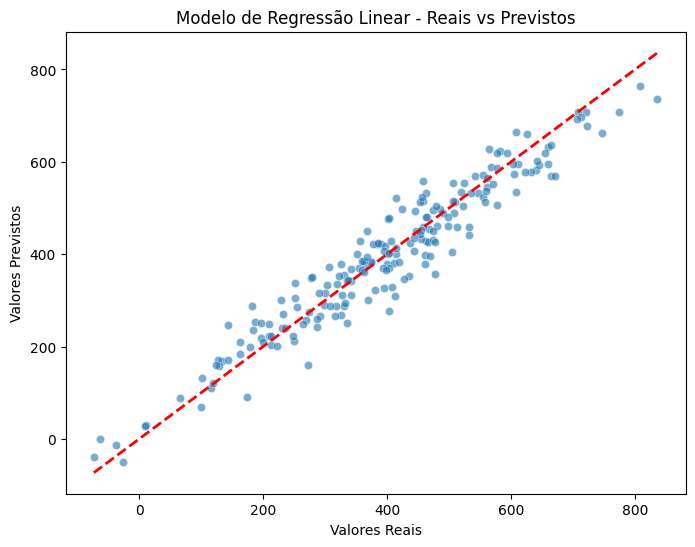

In [19]:
# --- Preparar dados ---
X = df[["Estrelas", "ProximidadeTurismo", "Capacidade"]]
y = df["Preco"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Treinar modelo ---
modelo2 = LinearRegression()
modelo2.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo2.predict(X_test)

# --- Avaliar ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# --- Plot Reais vs Previstos ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Modelo de Regressão Linear - Reais vs Previstos")
plt.show()